In [1]:
from collections import defaultdict
import hashlib
import math
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.image as mpimg
import numpy as np 
import pickle
import json
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
import cryptopunks.utils as cp
from cryptopunks import ipfs
data_dir = ('../cryptopunks/data')
assets_dir = ('../cryptopunks/assets')

## ColorPunx

The CryptoPunks are a collection of 24x24, 8-bit-style pixel art images of misfits and eccentrics. There are exactly 10,000 of them, each with their own ostensible personality and unique combination of distinctive, randomly generated features. This notebook is a study of the colors used in cryptopunks.

## Load a single punk and inspect data

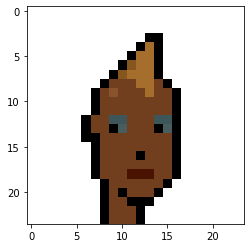

In [3]:
img = cp.get_punk(10)
plt.imshow(img)

### Generate or Load Color Map

Convert each string representation of the pixel to a unique 8 bit integer value. Buiuld the map(string->int8) and then run through all values in a conversion pass.

In [16]:
# this cell is expensive - do not run by default, load from pickle file
# this does the generation of the unique map across all punks.
'''
n=10000
_colors=defaultdict(list)
for i in range(0,n):
  flatPunk = cp.flatten(cp.get_punk(i))
  colors = np.unique(flatPunk)
  for c in colors:
    _colors[c].append(i)

with open(f"{data_dir}/_colors_count.pickle", 'wb') as filehandler:
    pickle.dump(_colors, filehandler)
'''
None

In [4]:
_colors = None
_imgmap = None

with open(f"{data_dir}/_colors_count.pickle", 'rb') as f:
    _colors = pickle.load(f)

with open(f"{assets_dir}/_img_uris.pickle", 'rb') as i:
    _imgmap = pickle.load(i)
    


The cryptopunks are composed of 222 unique colors; these will fit in an an 8 bit int for training.

### Explore the Color Punks Palette

Generate a color pallete of pixels starting from least frequently used.

In [5]:
sorted_colors=cp.sort_dict_by_function_of_value(_colors)
color_imgs = {i:cp.pixel_to_img(i, dim=(336,336)) for i in list(sorted_colors)}

### generate the json files, images for each color

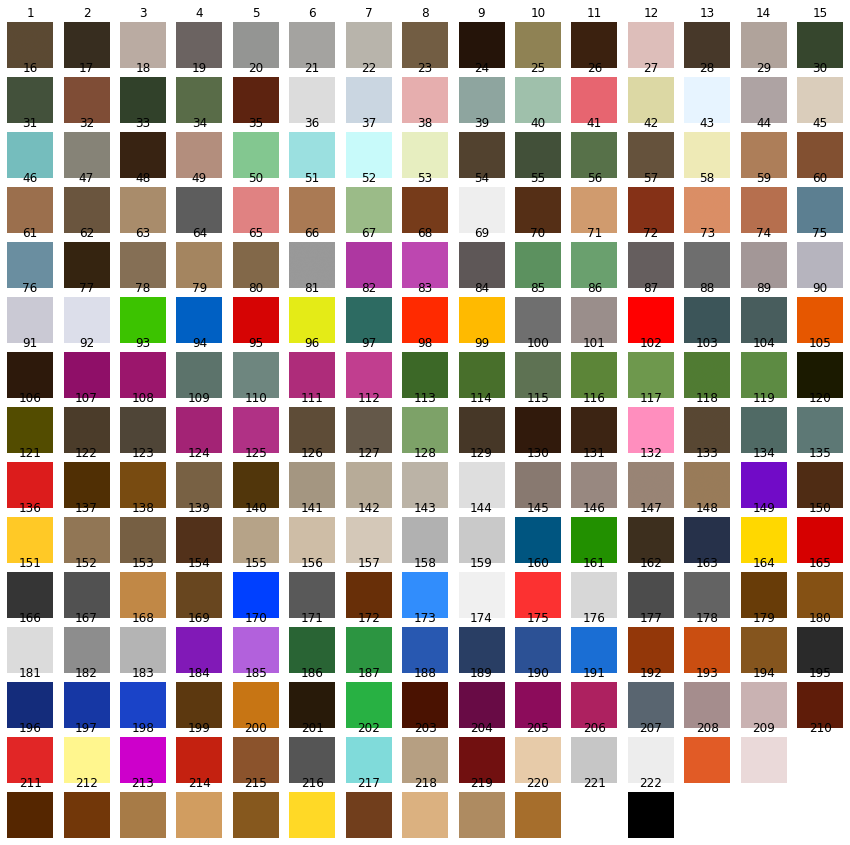

In [6]:
n=15  
(x,y) = (n,n)
# create figure
fig = plt.figure(figsize=(x,y))

i=1
for k in color_imgs.keys():
    fig.add_subplot(x, y, i)
    plt.imshow(color_imgs[k])
    plt.axis('off')
    plt.title(i)
    i=i+1

### write out the assets 

In [8]:
import json
_base_uri='https://gateway.pinata.cloud'
d={}
i=1
for k in color_imgs.keys():
    hexkey = cp.color_str_to_hex(k)
    d[hexkey]={
        'id': i,
        'name': hexkey,
        'description': f"{hexkey} is one of 222 colors in the cryptopunx color pallette. It is used by {len(_colors[k])} unique punks",
        'hash': hashlib.md5(color_imgs[k]).hexdigest(),
        'image': f"{_base_uri}{_imgmap[str(i)]}",
        'punks': _colors[k],
        'external_url': f"https://colorpunx.io/colors?i={i}&name={hexkey}"
    } 
    with open(f"{assets_dir}/json/colorpunx{i}.json", "w") as outfile:
         json.dump(d[hexkey], outfile)
    mpimg.imsave(f"{assets_dir}/images/colorpunx{i}.png", color_imgs[k])
    i = i + 1